##**Import Libraries**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

##**Load DataSet**

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###**Check Dimension**

In [3]:
df.shape

(7043, 21)

###Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##**Check Null Values**

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##**Heatmap**

<ipython-input-7-da799f8ee6d8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax)


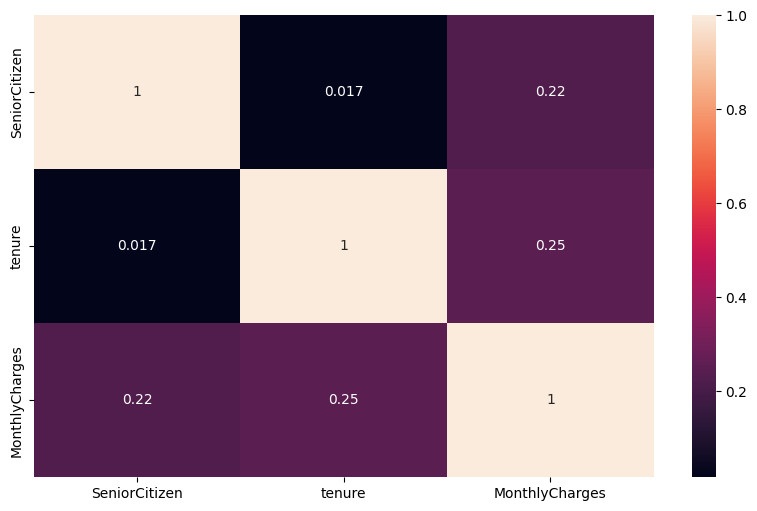

In [7]:
from numpy.ma.core import correlate
fig = plt.figure(figsize = (10,6))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

###Check DataSet Balancing

In [8]:
print(df['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


##**Data Preprocessing**
###Drop Irrevalent

In [9]:
df = df.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.shape

(7043, 20)

###Checking Uniqueness of every feature

In [11]:
print(df.nunique())

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


#**Exploratory Data Analysis**

##**Univariate Analysis**

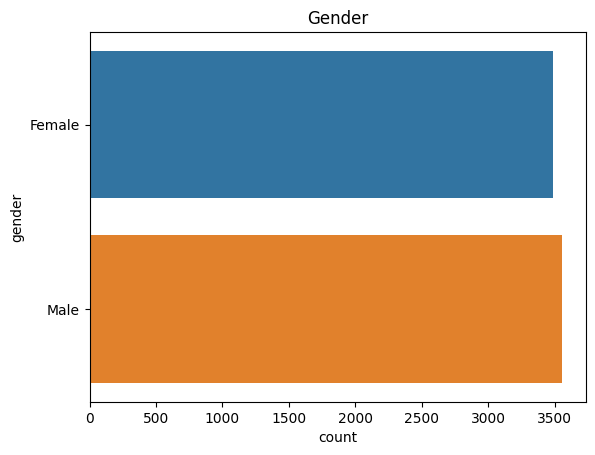

In [12]:
sns.countplot(y='gender',data = df)
plt.title('Gender');

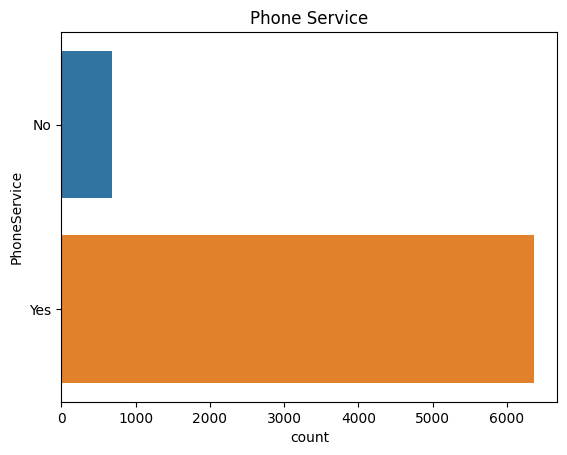

In [13]:
sns.countplot(y='PhoneService',data = df)
plt.title('Phone Service');

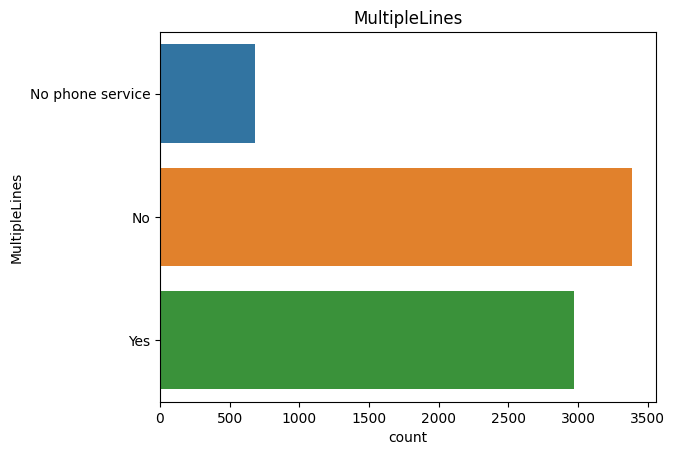

In [14]:
sns.countplot(y='MultipleLines',data = df)
plt.title('MultipleLines');

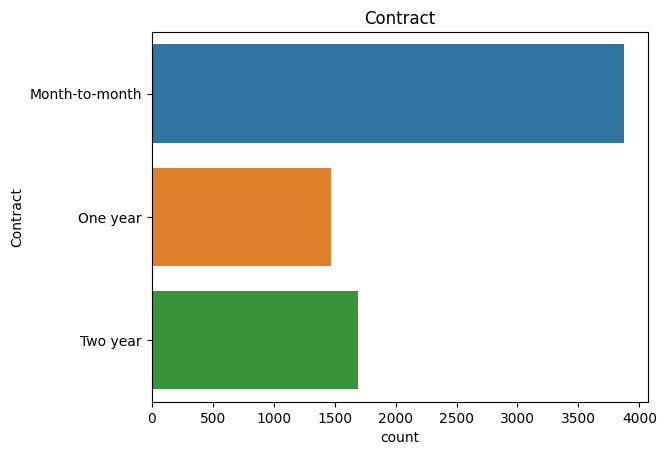

In [15]:
sns.countplot(y='Contract',data = df)
plt.title('Contract');

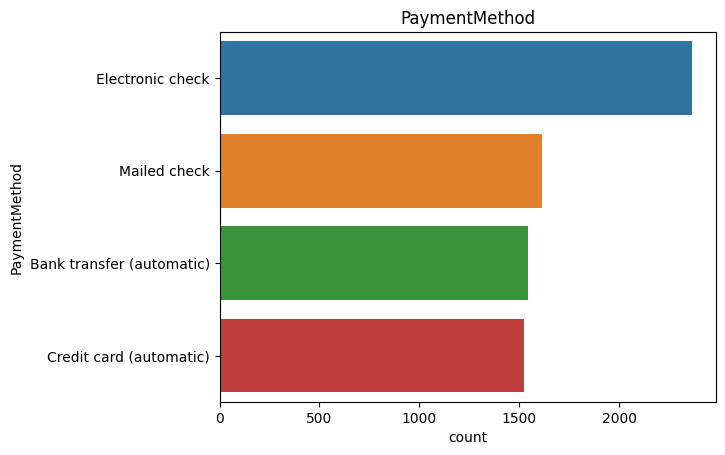

In [16]:
sns.countplot(y='PaymentMethod',data = df)
plt.title('PaymentMethod');

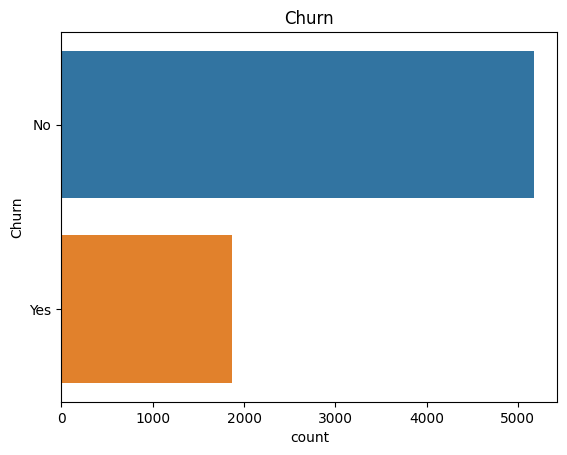

In [17]:
sns.countplot(y='Churn',data = df)
plt.title('Churn');

##**Bi-Variate Analysis**

<Axes: xlabel='PaymentMethod', ylabel='count'>

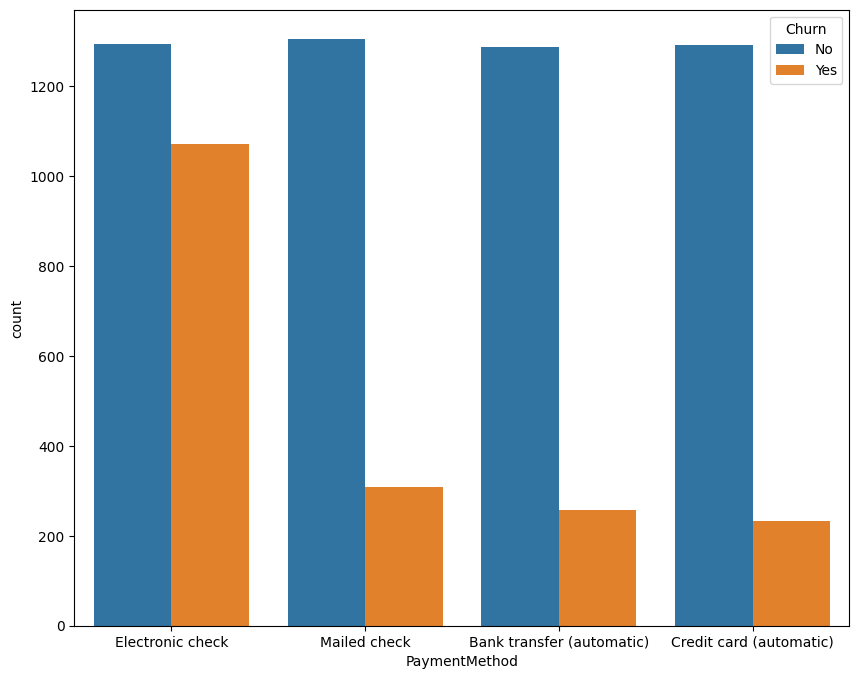

In [18]:
# Relation between PaymentMethod and Churn
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='PaymentMethod', hue='Churn')

Text(0, 0.5, 'Churn')

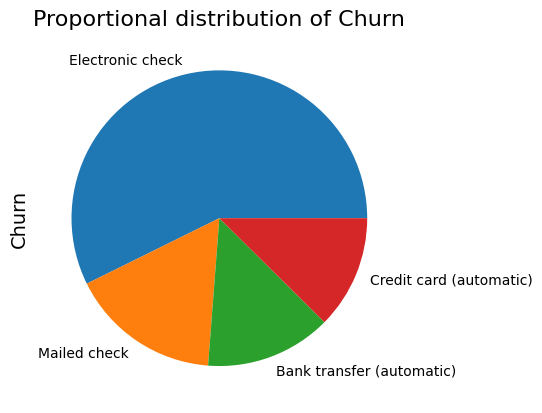

In [19]:
# Plotting the distribution of Paymenymethod where people churned
df[df['Churn']=='Yes']['PaymentMethod'].value_counts().plot(kind='pie')
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn',fontsize=14)

Text(0, 0.5, 'Churn')

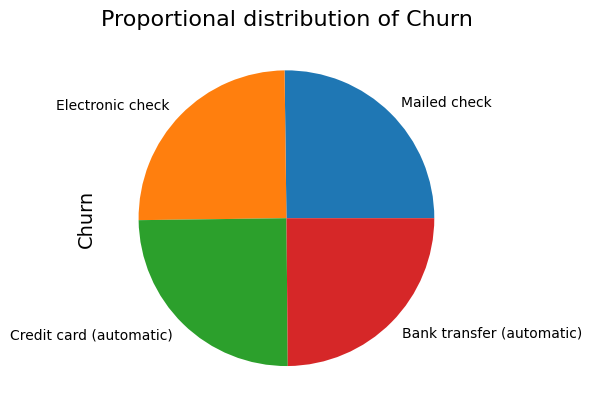

In [20]:
# Plotting the distribution of Paymenymethod where people churned
df[df['Churn']=='No']['PaymentMethod'].value_counts().plot(kind='pie')
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn',fontsize=14)

#**Feature Engineering**

In [21]:
# Data where tenure equals 0
df[df["tenure"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


<Figure size 2000x800 with 0 Axes>

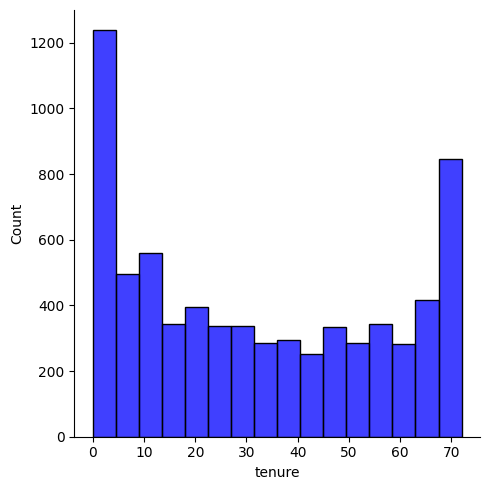

In [22]:
# Plotting tenure column with count
plt.figure(figsize=(20, 8))
sns.displot(df.tenure, color='blue')
plt.show()

In [23]:
# Replace tenure 0 with mean since there are no extreme values
df['tenure']=df['tenure'].replace(0,df['tenure'].mean())

In [24]:
# Selecting columns of object data type
cols = df.select_dtypes(include=object).columns

##**Label Encoding**

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    df[i]=le.fit_transform(df[i])

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


##**Heat Map**

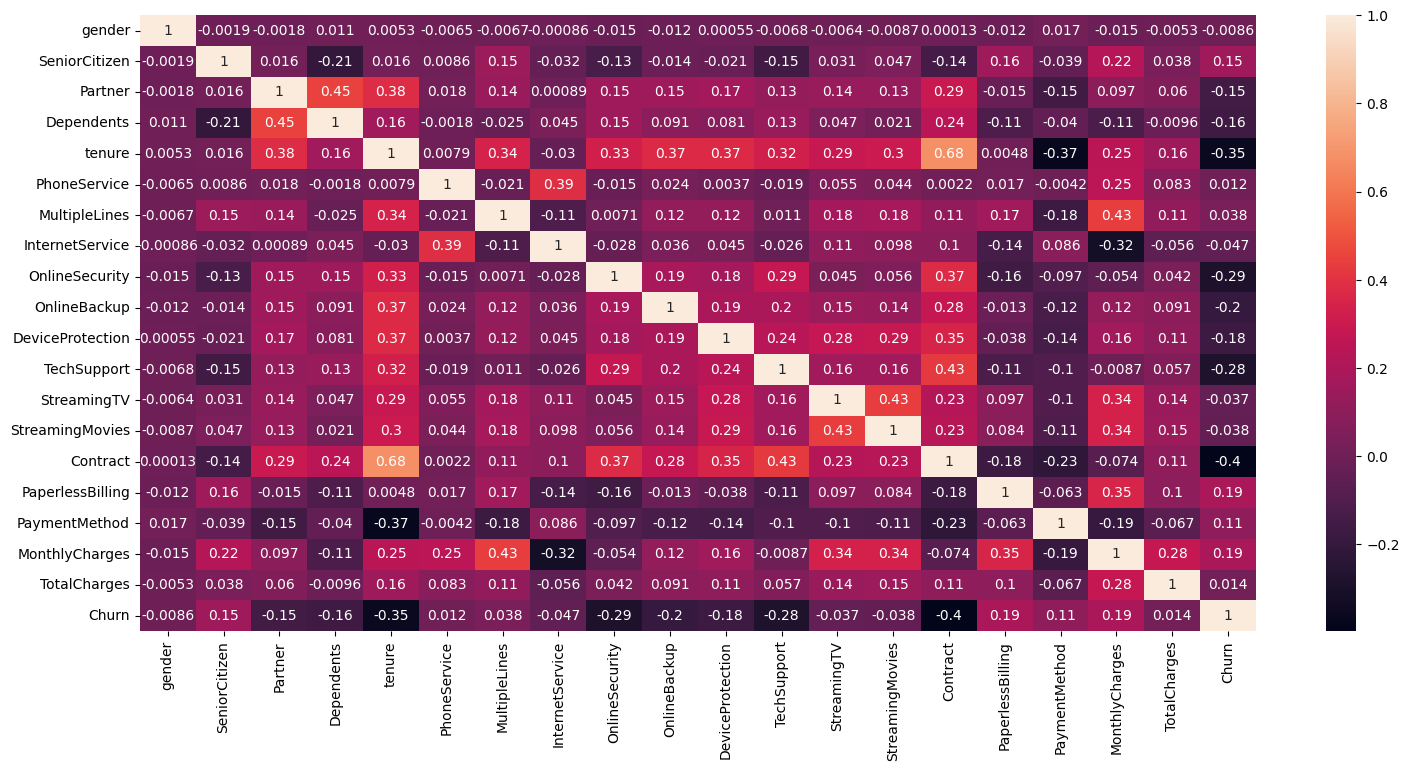

In [28]:
from numpy.ma.core import correlate
fig = plt.figure(figsize = (18,8))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

##**Synthetic Minority Oversampling Technique (SMOTE)**

In [29]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [30]:
X.shape

(7043, 19)

In [31]:
y.shape

(7043,)

In [32]:
os = SMOTE(random_state = 0)
# Splitting data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)
columns = X_train.columns

In [33]:
smote_data_X, smote_data_y = os.fit_resample(X_train, y_train)
smote_data_X = pd.DataFrame(data=smote_data_X, columns=columns)
smote_data_y = pd.DataFrame(data=smote_data_y, columns=['Churn'])

In [34]:
smote_data_X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,12.000000,1,0,2,1,1,1,1,1,1,2,0,3,19.700000,2234
1,0,0,0,0,42.000000,1,0,0,2,2,2,2,0,2,1,0,1,73.900000,2743
2,1,0,1,0,71.000000,1,2,0,2,2,0,2,0,0,2,0,0,65.150000,3962
3,1,0,1,1,71.000000,1,2,0,2,0,2,2,2,2,1,0,2,85.450000,5095
4,1,0,0,0,30.000000,1,0,0,2,2,0,2,2,0,1,0,2,70.400000,1676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,0,0,0,0,13.266287,0,0,0,0,0,2,0,0,2,0,1,2,58.089702,6310
8222,0,0,1,1,6.650969,1,0,1,0,1,0,0,1,0,0,1,2,80.649584,5383
8223,1,0,0,0,1.000000,1,0,0,0,2,0,0,0,0,0,0,2,50.674240,4232
8224,1,0,1,0,64.438980,1,0,0,1,0,0,1,2,2,1,1,0,75.709320,4074


In [35]:
smote_data_y

,Churn
0,0
1,1
2,0
3,0
4,0
...,...
8221,1
8222,1
8223,1
8224,1


In [36]:
print('% of each class in the dataset')
print(df['Churn'].value_counts() / len(df))


% of each class in the dataset
0    0.73463
1    0.26537
Name: Churn, dtype: float64


In [37]:
print('% of each class in the dataset')
print(smote_data_y['Churn'].value_counts() / len(smote_data_y))


% of each class in the dataset
0    0.5
1    0.5
Name: Churn, dtype: float64


##**Train_Test_Split**

In [38]:
X = smote_data_X
y = smote_data_y['Churn']

In [39]:
# Splitting data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

##**Logistic regression**

In [40]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_acc = lr.score(X_test,y_test)
print("Accuracy: ",lr_acc)

Accuracy:  0.7995139732685298


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##**Random Forest**

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = rf.score(X_test, y_test)
print("Accuracy:", rf_acc)


Accuracy: 0.8517618469015796


##**SVM**

In [42]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_acc = svm.score(X_test, y_test)
print("Accuracy:", svm_acc)


Accuracy: 0.571688942891859


##**Final Predictions**

In [43]:
model = pd.DataFrame({
    'Model'       : ['Logistics Regression', 'Random Forest','SVM'],'Accuracy'    : [lr_acc,rf_acc,svm_acc]})


##**Visualize Predictions**

Plotting based on Model and Accuracy


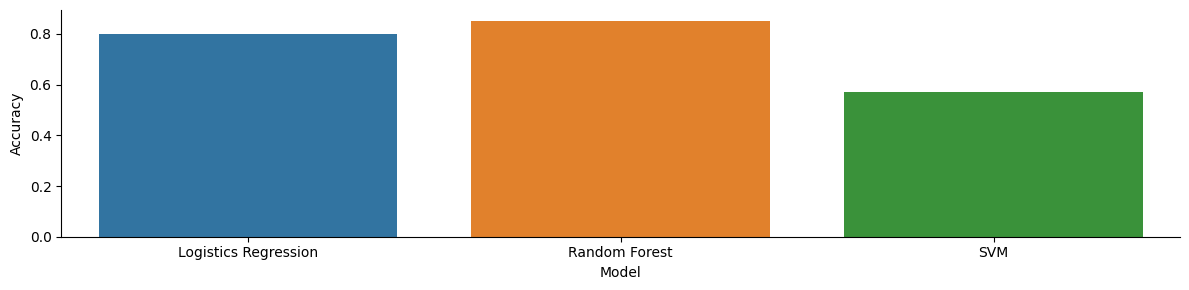

In [44]:
sns.catplot(x= 'Model', y= 'Accuracy', kind='bar',data= model, height=3, aspect=4)
print('Plotting based on Model and Accuracy')

##**Hyper parameter Tunning**

In [45]:
param_grid = [{'n_estimators': [100, 200, 300], 'max_depth': [None,2,3,10,20], 'max_features': ['sqrt',2,4,8,16,'log2', None]}]

In [46]:
temp_rf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_search=GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

In [47]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 10, 20],
                          'max_features': ['sqrt', 2, 4, 8, 16, 'log2', None],
                          'n_estimators': [100, 200, 300]}],
             scoring='roc_auc')

In [48]:
grid_search.best_score_

0.9250941270803675

In [49]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}

In [50]:
# Creating the final random forest model from the grid search's best estimator
final_rf=grid_search.best_estimator_

In [51]:
# Fitting the final model with training set
final_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, n_jobs=-1,
                       random_state=0)

In [52]:
# Making predictions on the train set
y_train_pred=final_rf.predict(X_train)

In [53]:
# Making predictions on the test set
y_test_pred=final_rf.predict(X_test)

#**Model Evaluation**

##**Confusion Matrix**

In [54]:
# Confusion Matrix for y_test and y_test_pred
confusion_mat=pd.DataFrame(confusion_matrix(y_test, y_test_pred))

In [55]:
confusion_mat.index=['Actual Negative', 'Actual Positive']
confusion_mat.columns=['Predicted Negative', 'Predicted Positive']
confusion_mat

,Predicted Negative,Predicted Positive
Actual Negative,711,141
Actual Positive,97,697


##**Accuracy**

In [56]:
# Accuracy score on the test set.
print('Accuracy score for test data is:', accuracy_score(y_test, y_test_pred))

Accuracy score for test data is: 0.8554070473876063


##**Precision**

In [57]:
# Precision score on the training set
print('Accuracy score for train data is:', precision_score(y_train, y_train_pred))

Accuracy score for train data is: 0.9943045563549161


In [58]:
 #Precision score on the test set.
print('Accuracy score for test data is:', precision_score(y_test, y_test_pred))

Accuracy score for test data is: 0.8317422434367542


##**Recall**

In [59]:
# recall score on the training set
print('Accuracy score for train data is:', recall_score(y_train, y_train_pred))

Accuracy score for train data is: 0.9993974088580898


In [60]:
# recall score on the test set.
print('Accuracy score for test data is:', recall_score(y_test, y_test_pred))

Accuracy score for test data is: 0.8778337531486146


##**F1-Score**

In [67]:
Classification_report = classification_report(y_test, y_test_pred)
print("\nClassification_report:")
print(Classification_report)



Classification_report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       852
           1       0.83      0.88      0.85       794

    accuracy                           0.86      1646
   macro avg       0.86      0.86      0.86      1646
weighted avg       0.86      0.86      0.86      1646

